In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from plotnine import ggplot, aes, geom_bar, geom_point #datavis library

In [4]:
df = pd.read_csv('../../Data/complete_fire.csv')

In [5]:
df.isnull().sum()

unique_fire_identifier        0
lattitude                     0
longitude                     0
acres_burned                  0
fire_cause                    0
incident_name                 0
IsFSAssisted                  0
origin_county                 0
state                         0
year                          0
month                         0
value                     40987
anomaly                   40987
area (acres)              39756
population                39756
d0                        34889
d1                        34889
d2                        34889
d3                        34889
d4                        34889
DSCI_avg                  34889
DSCI_summed               34889
precipitation(in)         42654
dtype: int64

In [7]:
df2 = df.dropna()

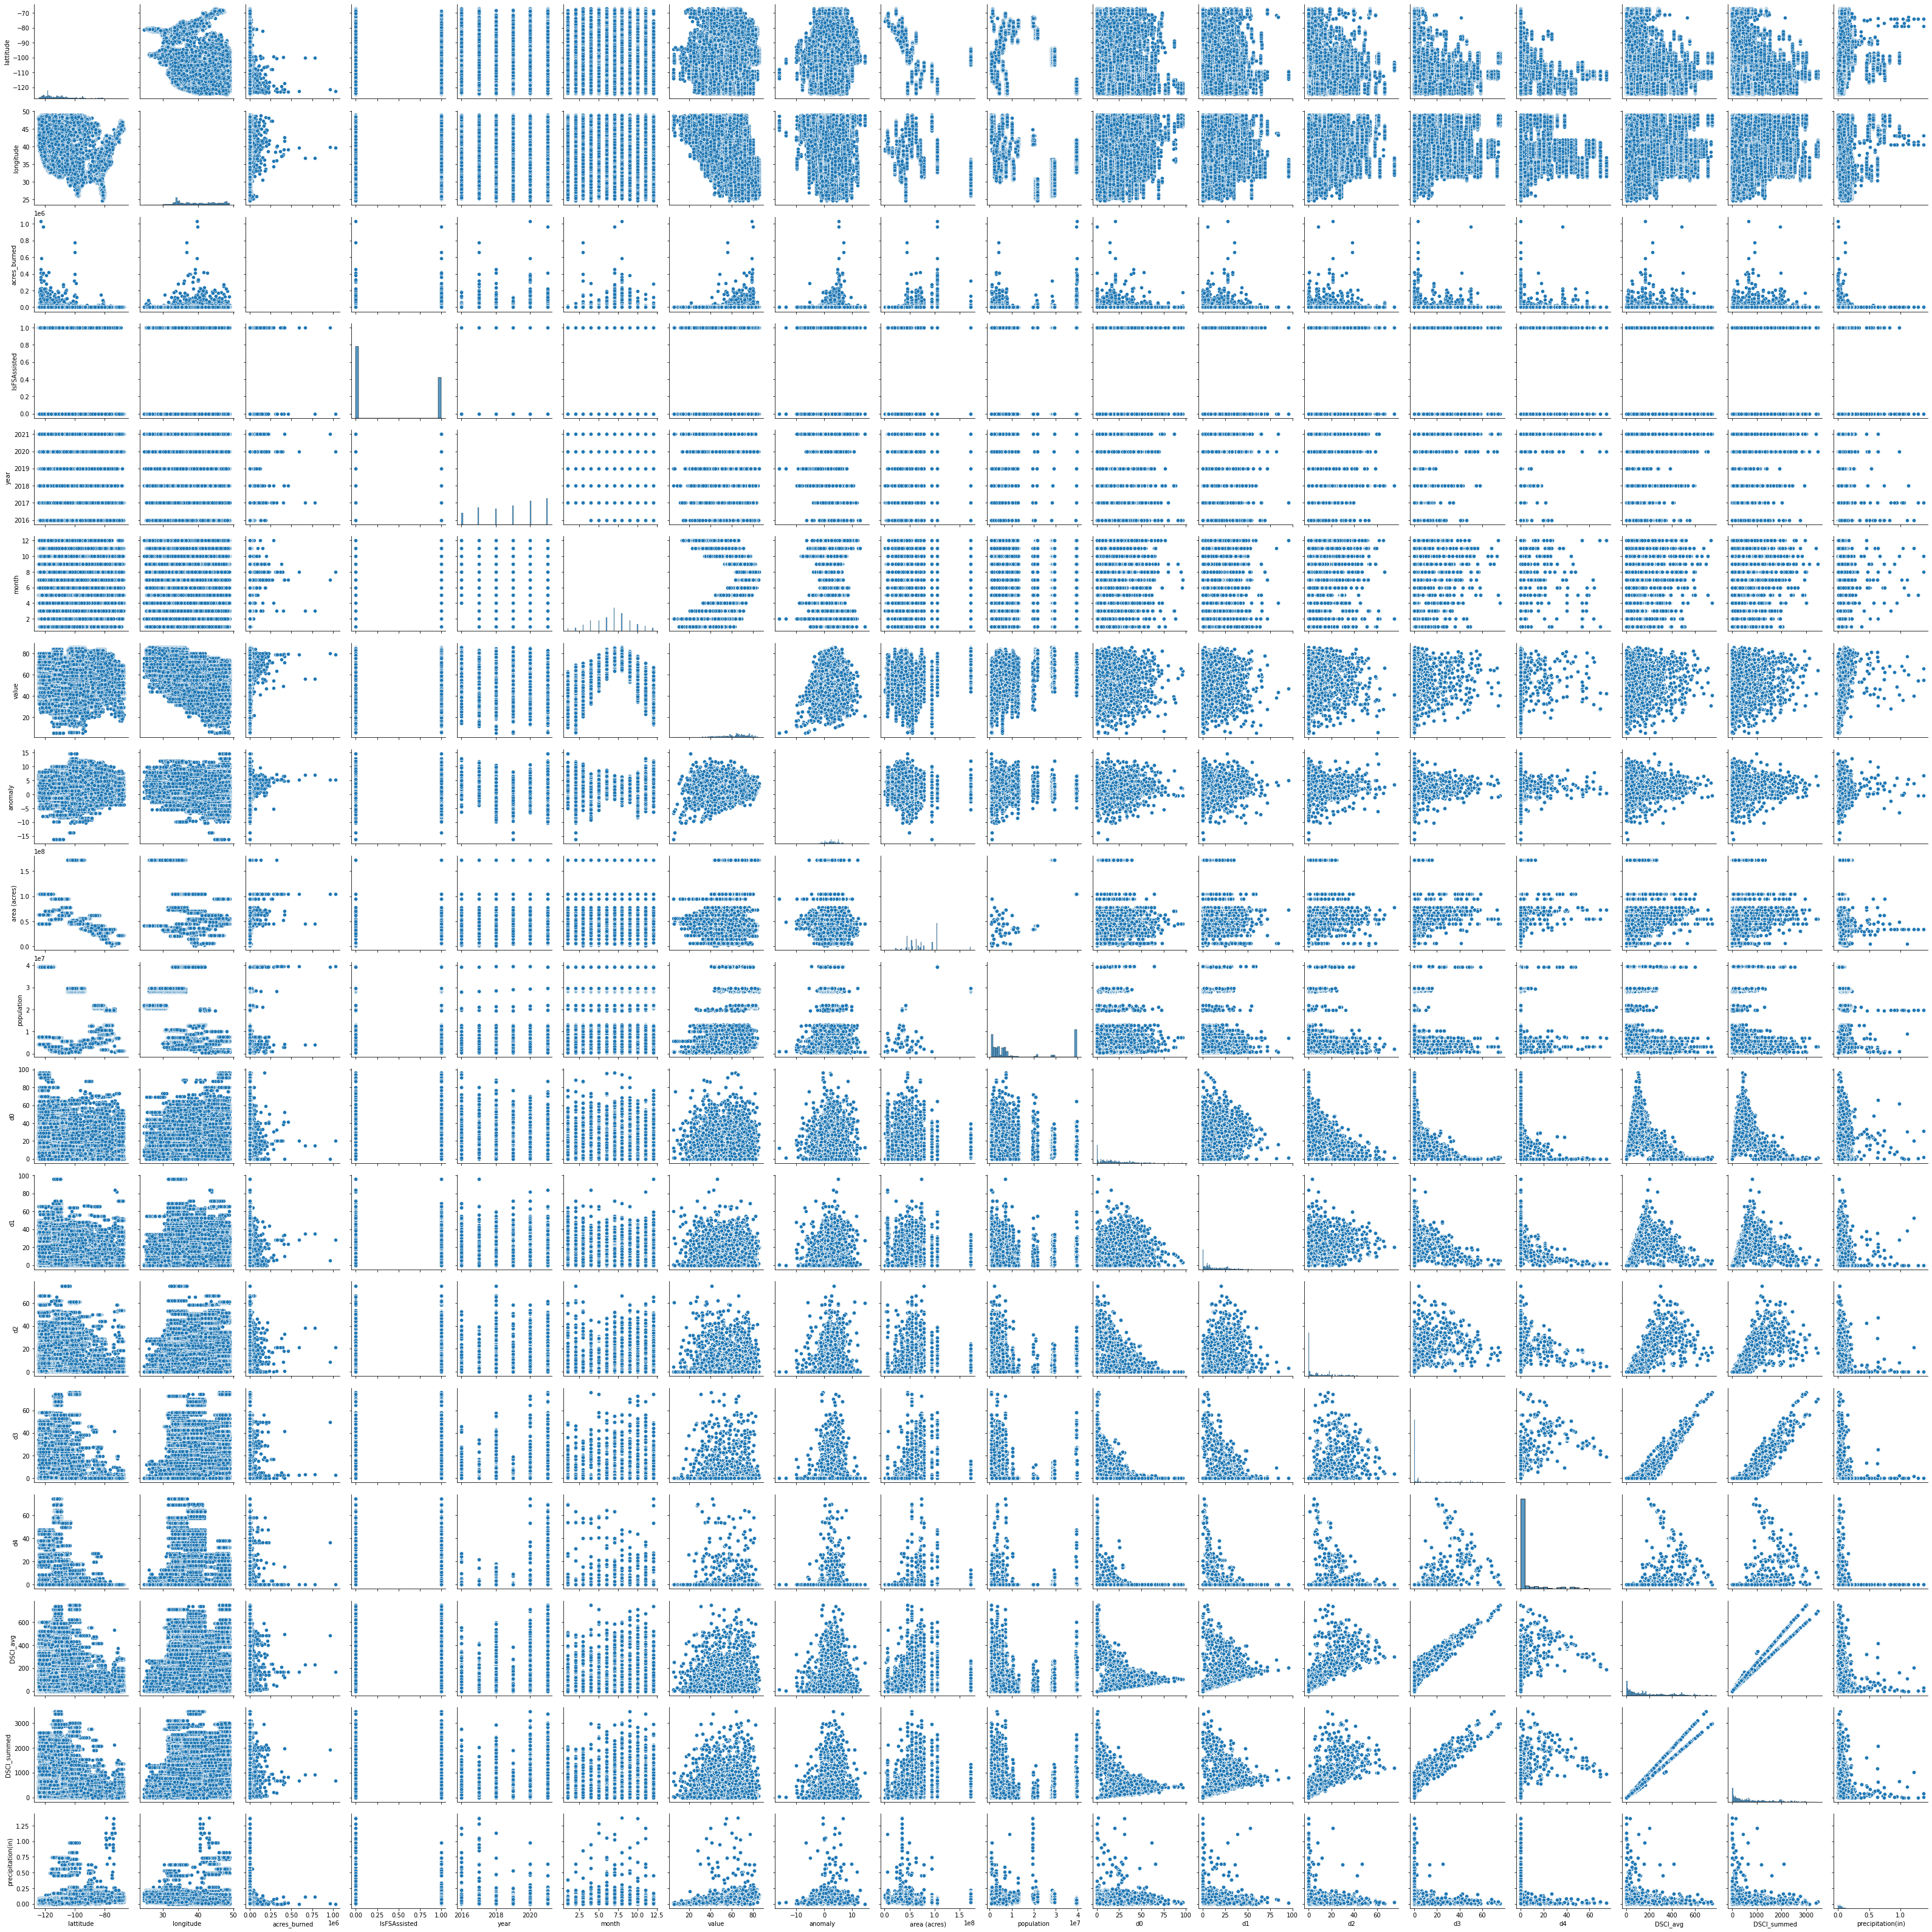

In [9]:
sns.pairplot(df2) # i think this is kind of unreadable

In [14]:
corr = df2.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

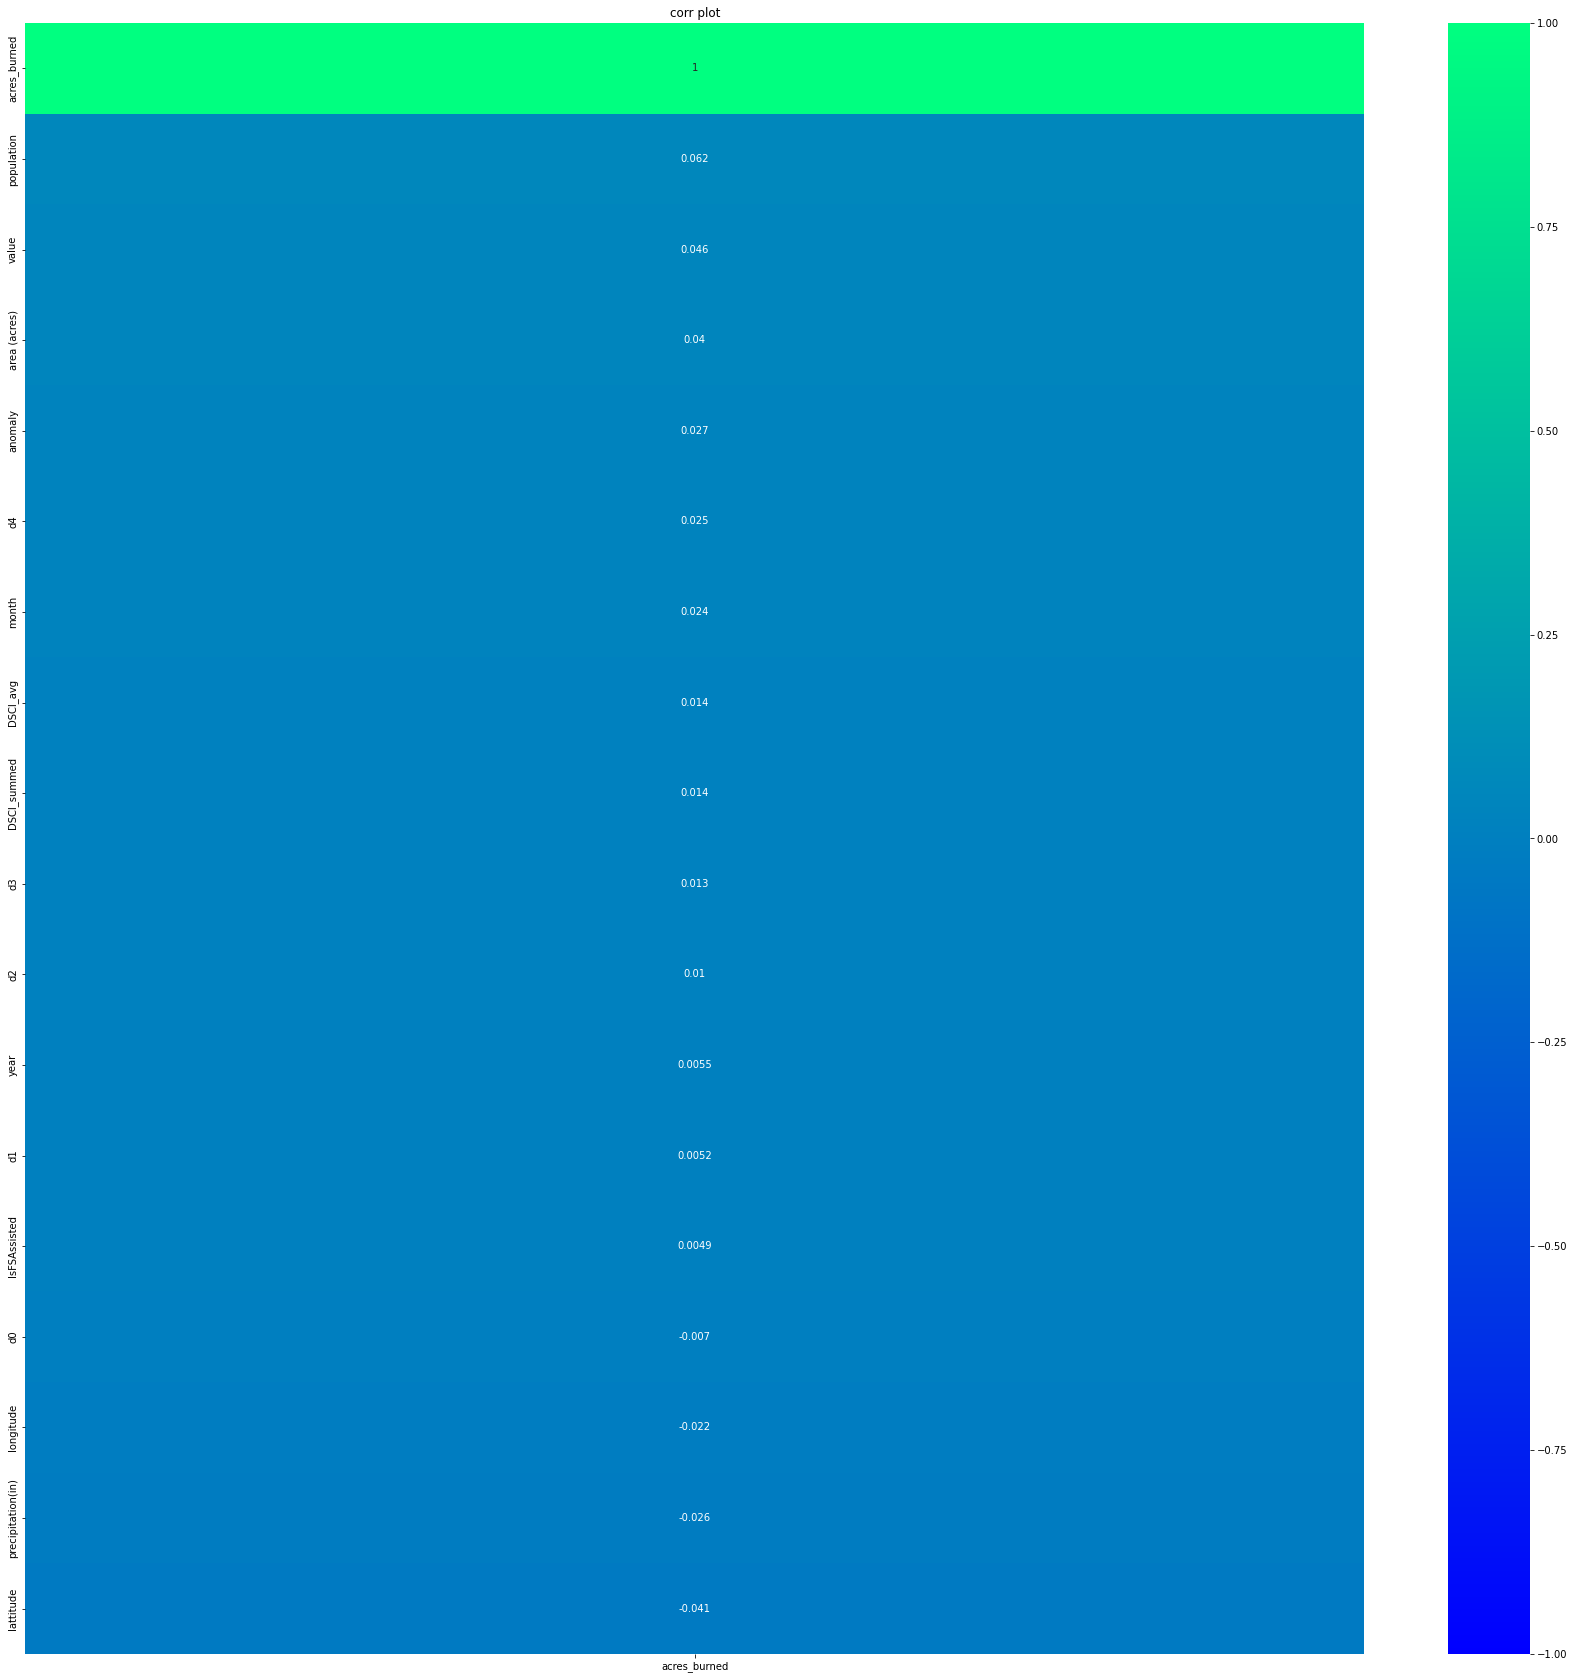

In [15]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

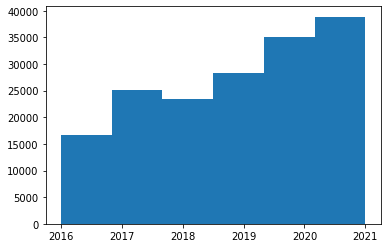

In [22]:
plt.hist(df2['year'], bins = 6);

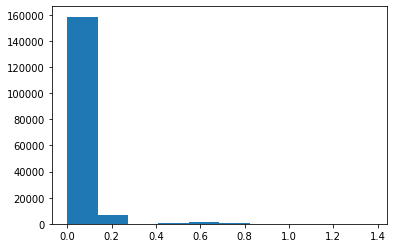

In [24]:
plt.hist(df2['precipitation(in)']);

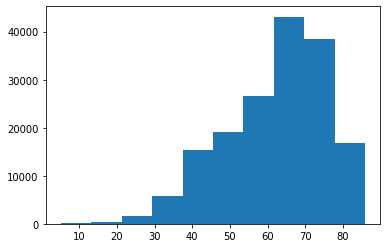

In [25]:
plt.hist(df2['value']);

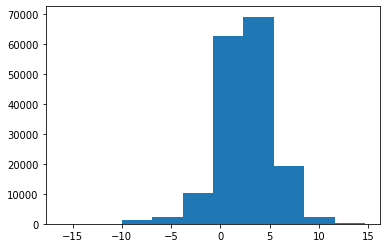

In [27]:
plt.hist(df2['anomaly']);

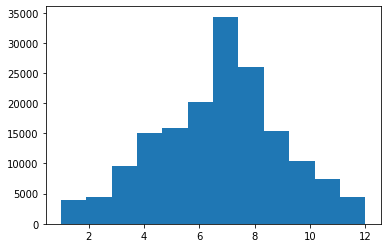

In [28]:
plt.hist(df2['month'], bins = 12);

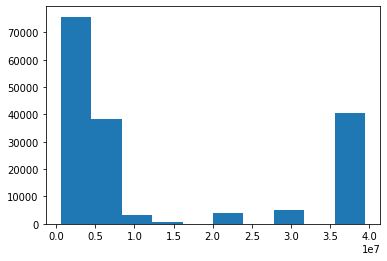

In [29]:
plt.hist(df2['population']);

In [30]:
df['state'].value_counts()

CA    47626
AZ    15803
MT    14908
OR    14191
WA    10958
UT     9676
ID     9472
CO     8304
NM     7908
ND     7809
WY     7792
TX     7033
MN     6614
OK     6508
SD     5618
NV     4937
FL     4793
AK     3999
ME     3031
MS     2053
AR     1562
MI     1480
MO     1155
AL     1106
KY      932
SC      890
NC      847
LA      712
TN      633
IL      595
VA      559
KS      552
OH      499
NE      498
GA      476
WI      403
WV      277
PA      270
IN      267
IA      267
NY      185
MA      163
NH      106
MD       89
NJ       87
VT       78
HI       38
DC       22
CT        4
DE        2
Name: state, dtype: int64

In [81]:
bins = [0, 0.2501, 9.901, 99.901, 299.01, 999.01, 4999.01, 9999.01, 49999.01, 99999.01]
group_names = ['A','B','C','D','E','F','G','H','I','J']


In [82]:
d = dict(enumerate(group_names, 1))

df2['class'] = np.vectorize(d.get)(np.digitize(df2['acres_burned'], bins))

C:\Users\dmarm\AppData\Local\Temp\ipykernel_15332\1920520338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [83]:
df2.head()

unique_fire_identifier   lattitude  longitude  acres_burned  \
34889      2016-IDBOD-000058 -116.330913  43.406206           0.1   
34890      2016-MNRLA-000184  -94.916910  48.017407           0.1   
34891      2016-MNRLA-000185  -95.015306  47.875908           0.1   
34892      2016-AZA5S-002056 -112.761608  34.201307           0.5   
34893      2016-AZNAA-000033 -108.537233  36.744172           0.5   

         fire_cause incident_name  IsFSAssisted origin_county state  year  \
34889         Human  SOUTH CLOVER           1.0           Ada    ID  2016   
34890  Undetermined        RL 130           0.0      Beltrami    MN  2016   
34891  Undetermined        RL 131           0.0      Beltrami    MN  2016   
34892  Undetermined       KRISTEE           0.0       Yavapai    AZ  2016   
34893         Human     HOGBACK 1           1.0      San Juan    NM  2016   

       ...         d0         d1        d2   d3   d4    DSCI_avg  DSCI_summed  \
34889  ...   8.043333   0.000000  0.000000  0.0  0.0    8.043333        24.13   
34890  ...   9.663333   1.026667  0.000000  0.0  0.0   11.716667        35.15   
34891  ...   9.663333   1.026667  0.000000  0.0  0.0   11.716667        35.15   
34892  ...  32.776667  65.580000  1.170000  0.0  0.0  167.446667       502.34   
34893  ...  53.023333  43.686667  0.086667  0.0  0.0  140.656667       421.97   

       precipitation(in)  acres_class  class  
34889           0.040772            A      A  
34890           0.040886            A      A  
34891           0.040886            A      A  
34892           0.031042            B      B  
34893           0.235141            B      B  

[5 rows x 25 columns]

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167273 entries, 34889 to 206138
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unique_fire_identifier  167273 non-null  object 
 1   lattitude               167273 non-null  float64
 2   longitude               167273 non-null  float64
 3   acres_burned            167273 non-null  float64
 4   fire_cause              167273 non-null  object 
 5   incident_name           167273 non-null  object 
 6   IsFSAssisted            167273 non-null  float64
 7   origin_county           167273 non-null  object 
 8   state                   167273 non-null  object 
 9   year                    167273 non-null  int64  
 10  month                   167273 non-null  int64  
 11  value                   167273 non-null  float64
 12  anomaly                 167273 non-null  float64
 13  area (acres)            167273 non-null  float64
 14  population      

In [84]:
df2['class'].value_counts()

A    55304
B    38521
C    22983
F    18769
E    17182
D    13396
H      499
G      445
I       91
J       83
Name: class, dtype: int64

In [85]:
baseline = 55304/167273
baseline

0.3306212000741303

<Figure size 3600x3600 with 0 Axes>

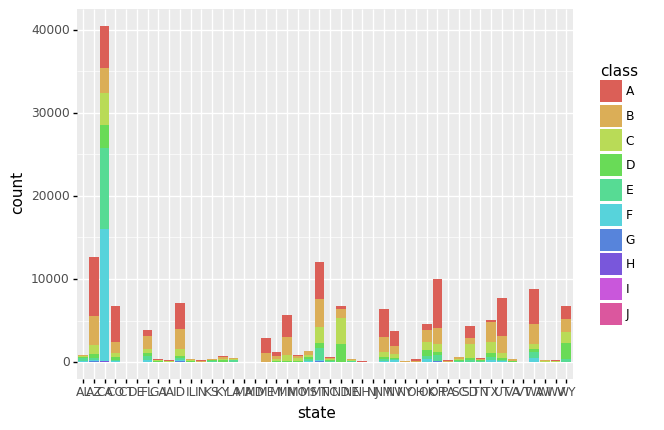

<ggplot: (109637406510)>

In [88]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'state', fill = 'class'), data = df2) + geom_bar()

<Figure size 3600x3600 with 0 Axes>

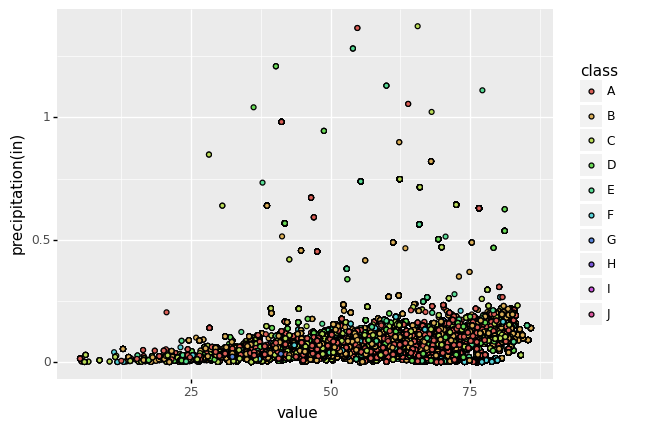

<ggplot: (109647550952)>

In [90]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'value', y= 'precipitation(in)', fill = 'class'), data = df2) + geom_point()

<Figure size 3600x3600 with 0 Axes>

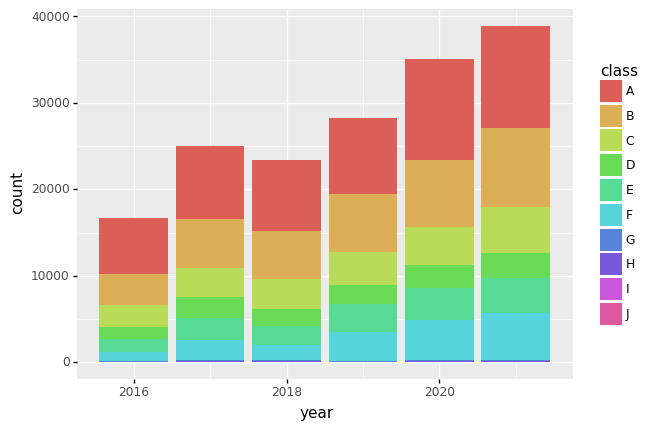

<ggplot: (109637452499)>

In [91]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'year', fill = 'class'), data = df2) + geom_bar()

<Figure size 3600x3600 with 0 Axes>

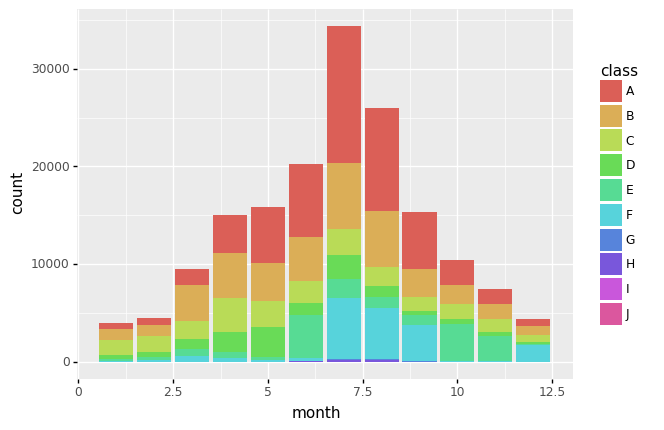

<ggplot: (109631676787)>

In [98]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'month', fill = 'class'), data = df2) + geom_bar()

In [92]:
df2['origin_county'].value_counts().head(15)

Los Angeles       13448
Riverside          3492
Coconino           2921
Beltrami           2122
Lake               1940
San Juan           1698
Benson             1661
Lincoln            1648
Humboldt           1581
San Bernardino     1536
Gila               1447
Deschutes          1347
Siskiyou           1346
Big Horn           1332
Grant              1311
Name: origin_county, dtype: int64

In [93]:
df2['fire_cause'].value_counts()

Human           65559
Unknown         49541
Natural         30122
Undetermined    22051
Name: fire_cause, dtype: int64

In [95]:
ca_fire = df2[df2["state"] == 'CA']

In [64]:
corr2 = ca_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

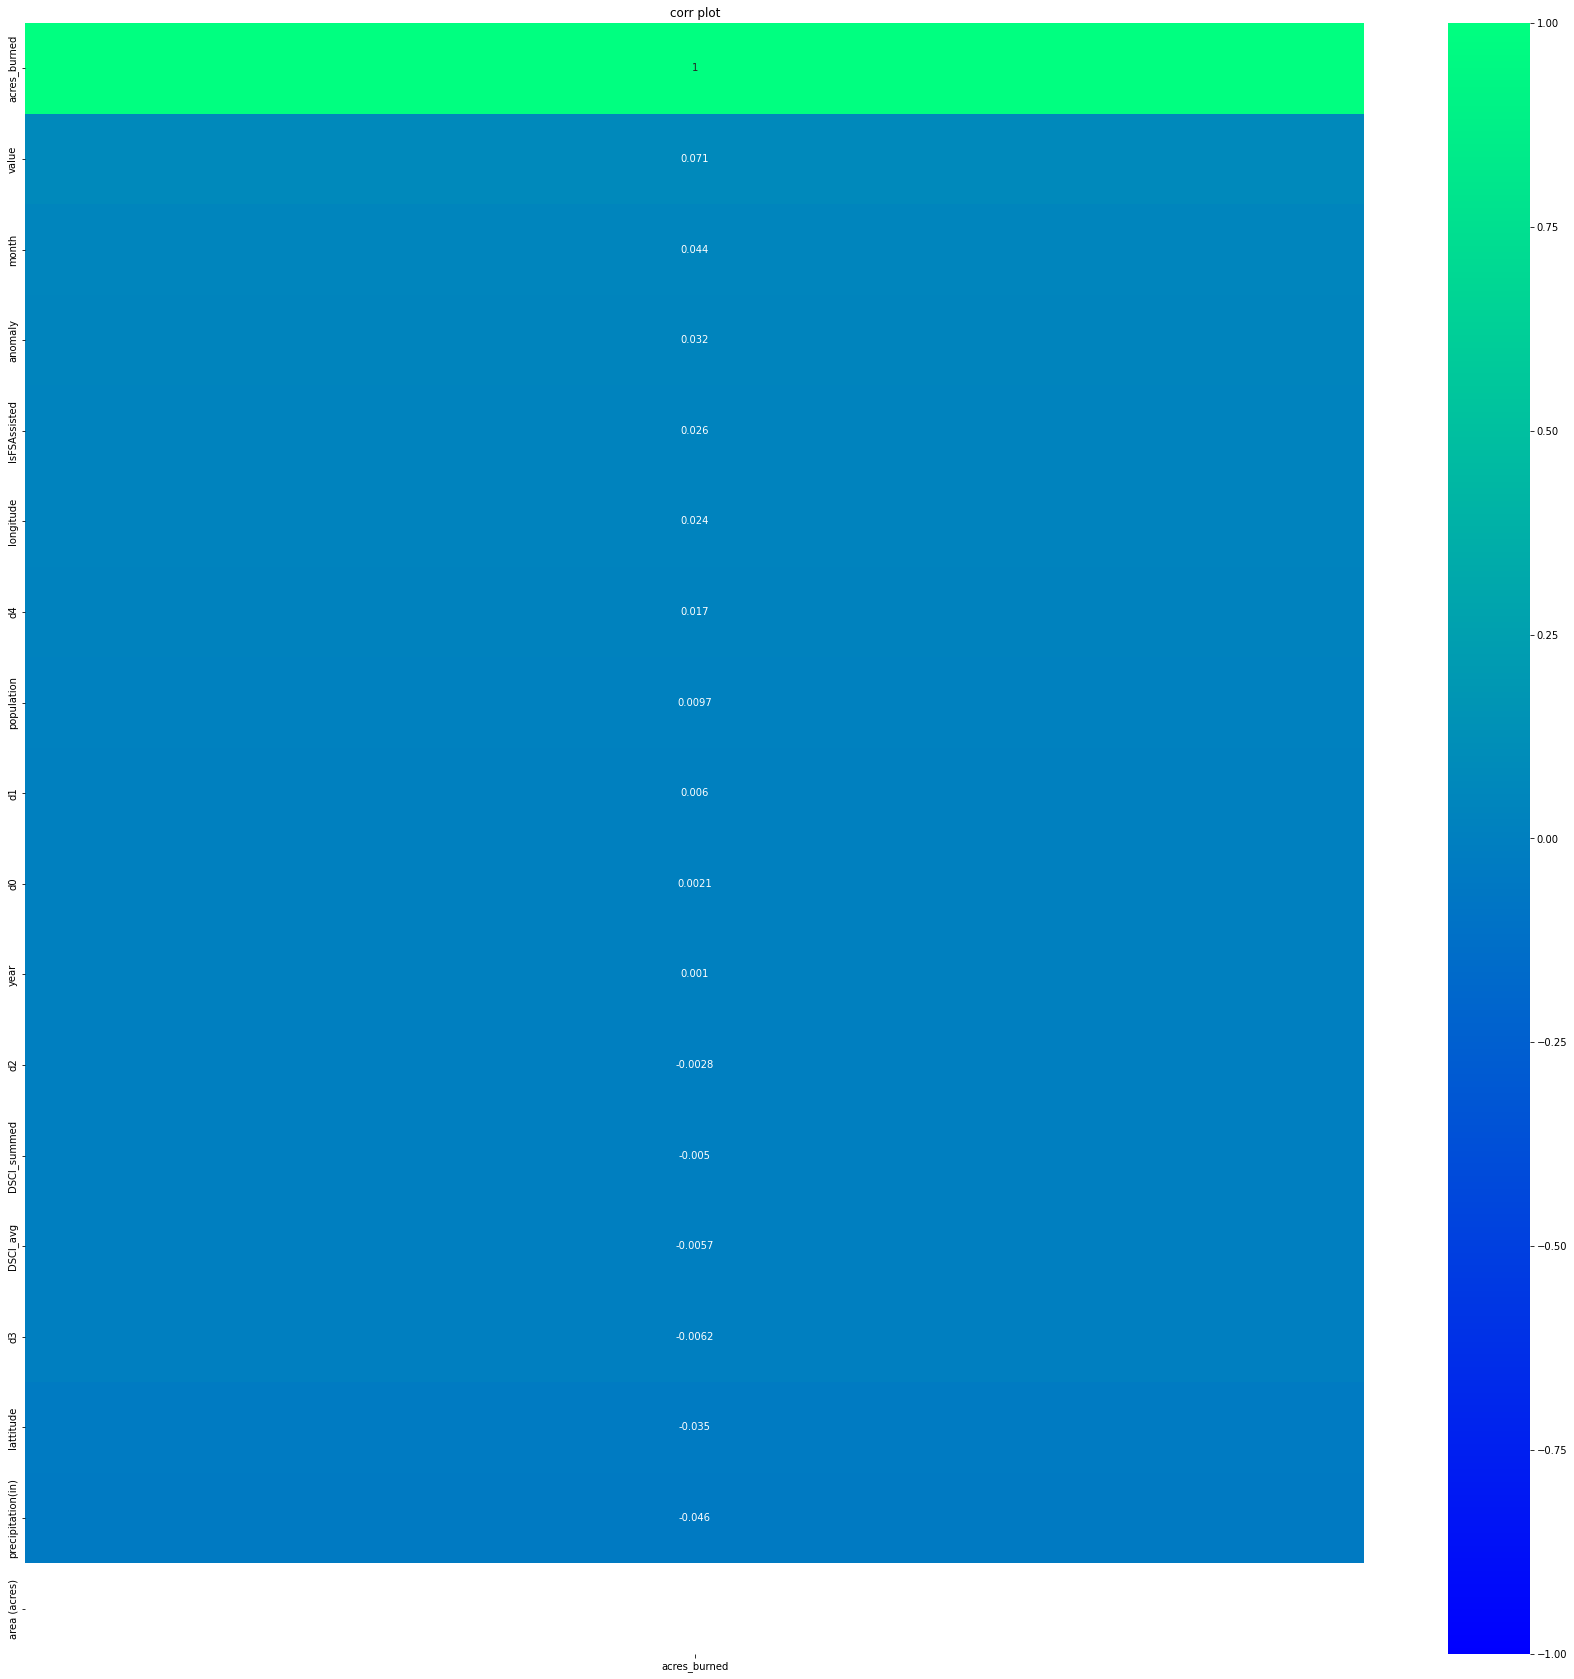

In [65]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr2, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

In [96]:
la_county_fire = ca_fire[ca_fire["origin_county"] == 'Los Angeles']

In [67]:
corr3 = la_county_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

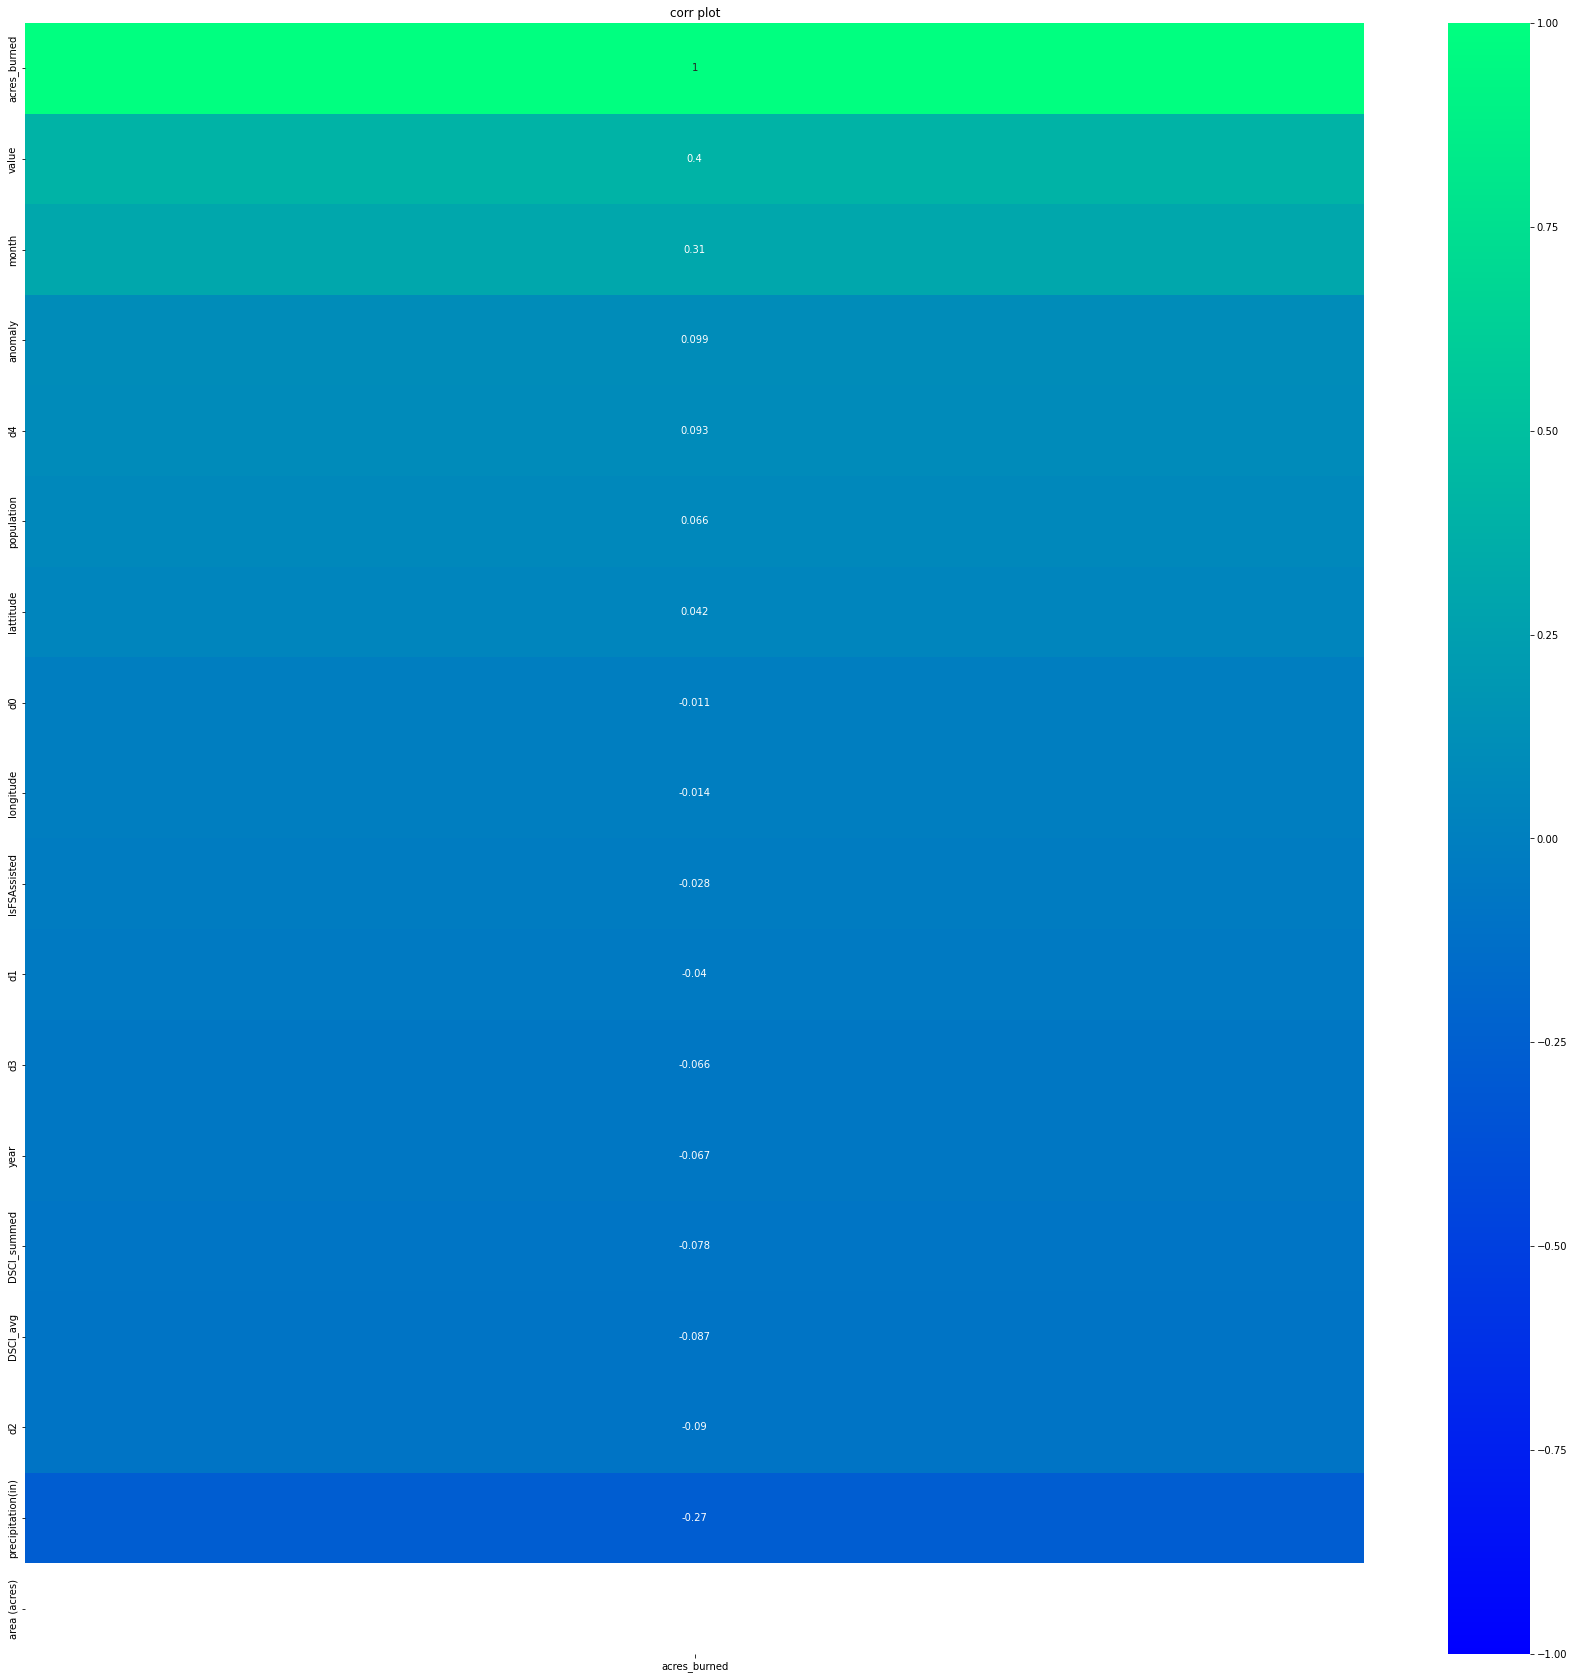

In [68]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr3, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

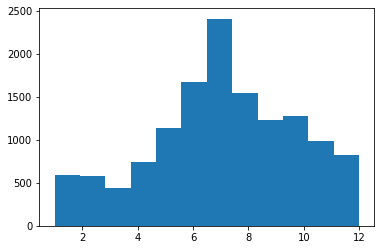

In [69]:
plt.hist(la_county_fire['month'], bins = 12);

<Figure size 3600x3600 with 0 Axes>

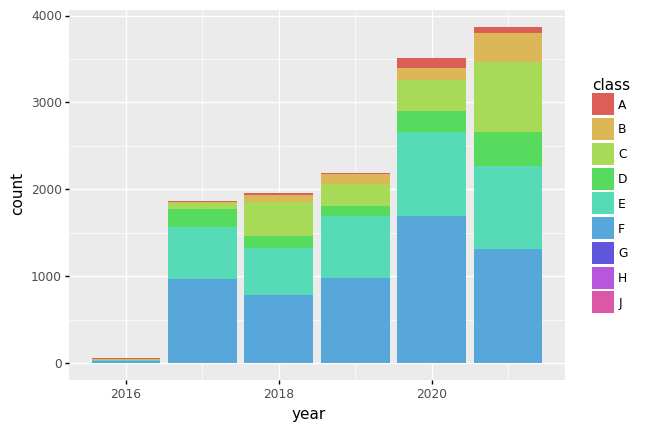

<ggplot: (109633829030)>

In [97]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'year', fill = 'class'), data = la_county_fire) + geom_bar()

In [99]:
la_county_fire['class'].value_counts()

F    5751
E    3786
C    1880
D    1106
B     694
A     224
H       3
G       3
J       1
Name: class, dtype: int64

In [101]:
big_fire = df2[df2["acres_burned"] > 99.9]

In [102]:
big_fire['class'].value_counts()

F    18769
E    17182
D    13396
H      499
G      445
I       91
J       83
Name: class, dtype: int64

In [74]:
corr4 = big_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

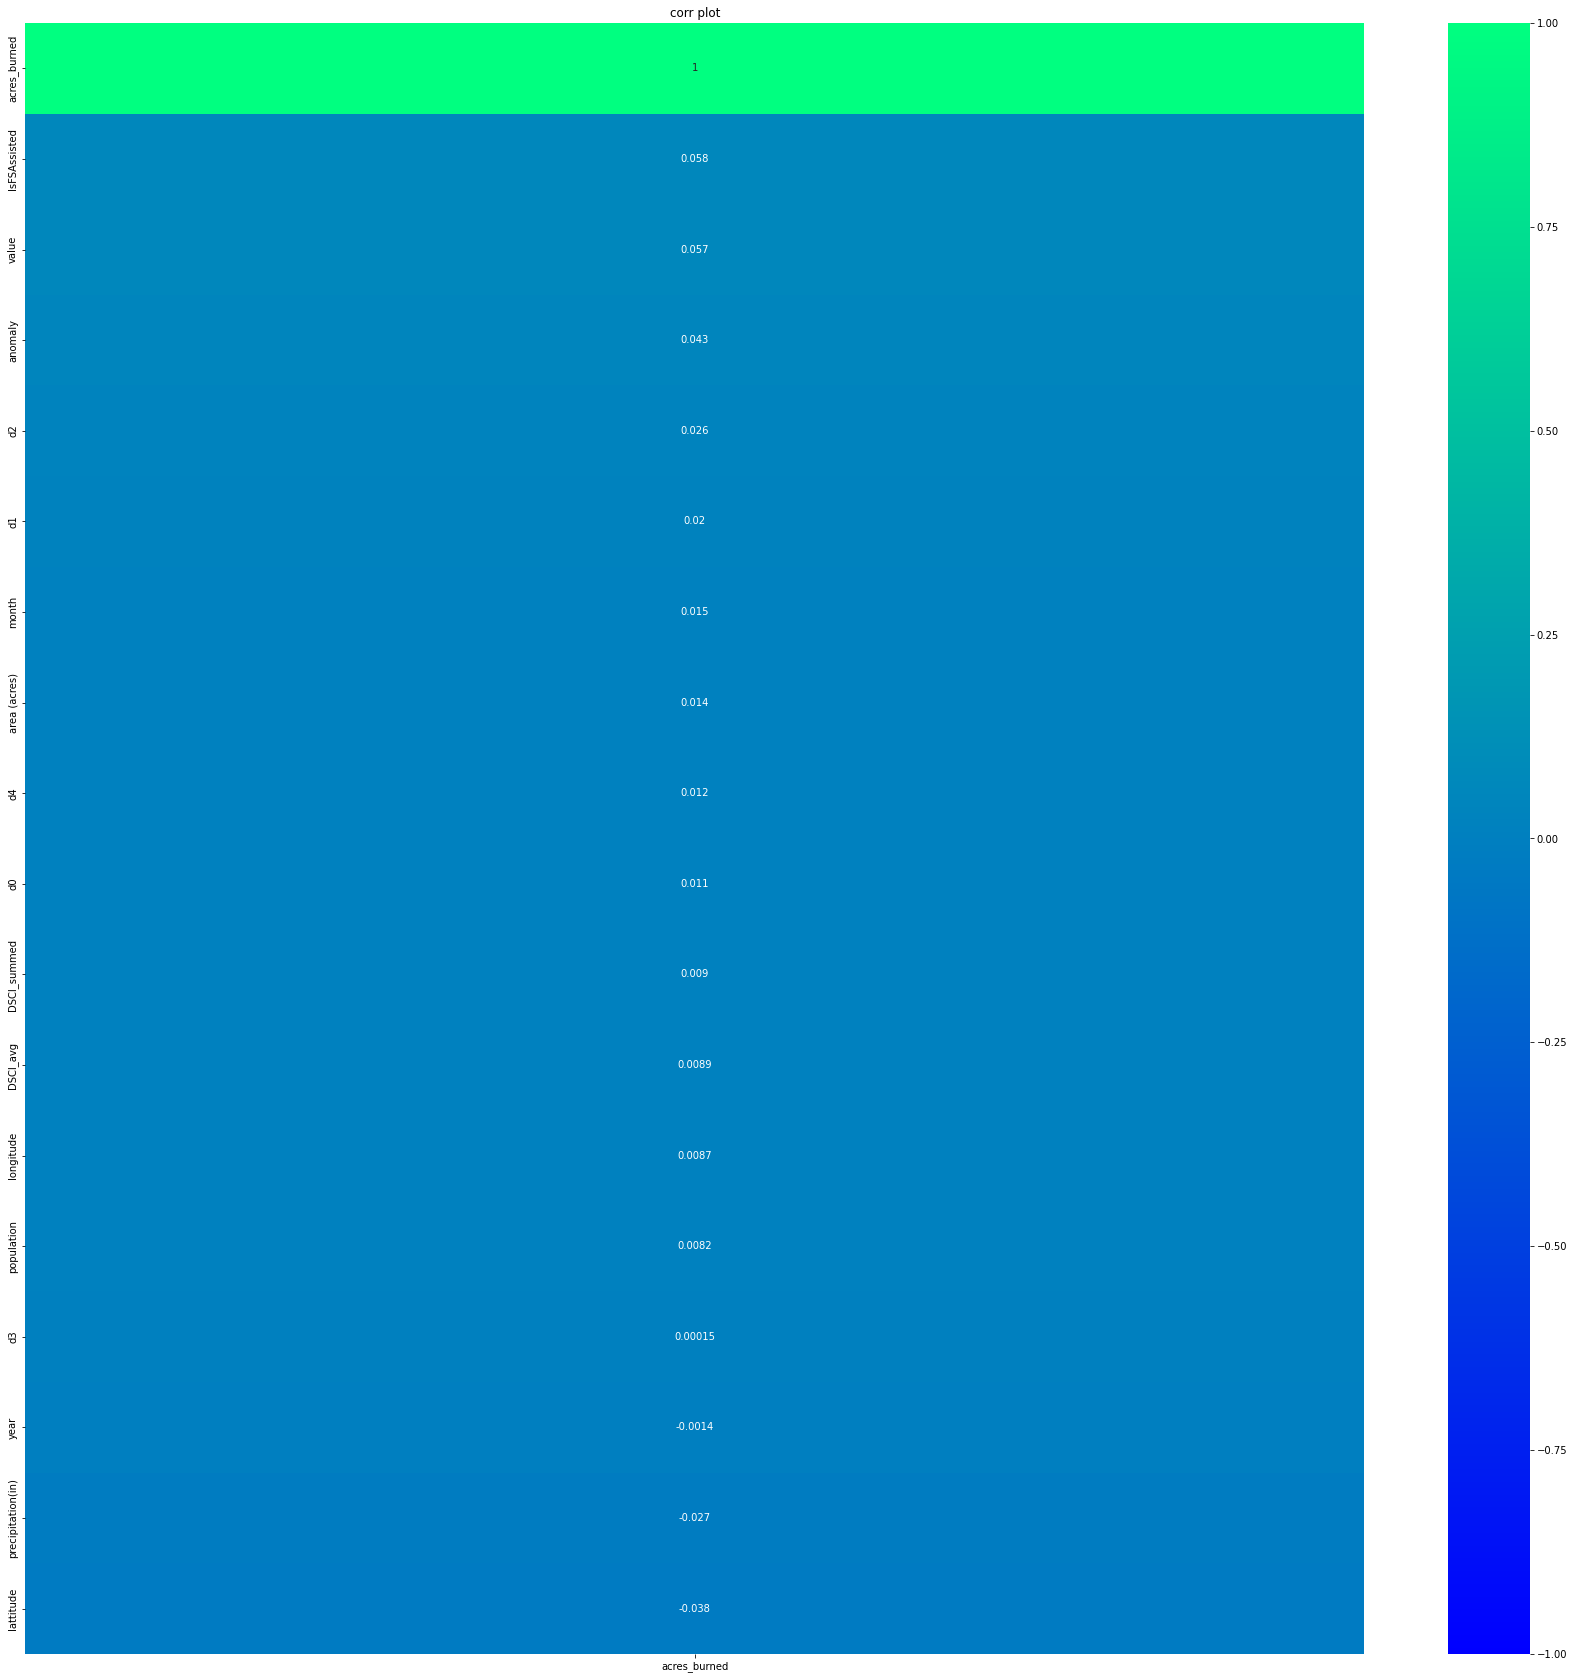

In [75]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr4, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

<Figure size 3600x3600 with 0 Axes>

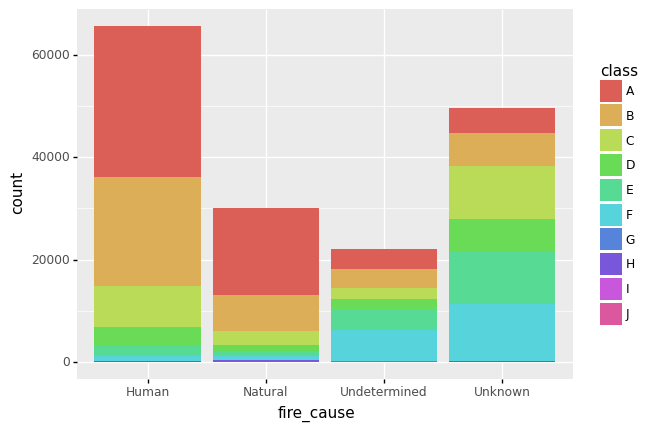

<ggplot: (109631055659)>

In [103]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'fire_cause', fill = 'class'), data = df2) + geom_bar()

In [105]:
class_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3, 
    'D' : 4, 
    'E' : 5, 
    'F' : 6, 
    'G' : 7, 
    'H' : 8, 
    'I' : 9, 
    'J' : 10
}

In [106]:
df2['class'] = df2['class'].map(class_map)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_15332\2116744872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [117]:
class_map = {
    1 : 0,
    2 : 1,
    3 : 2, 
    4 : 3, 
    5 : 4, 
    6 : 5, 
    7 : 6, 
    8 : 7, 
    9 : 8, 
    10 : 9
}

In [118]:
df2['class'] = df2['class'].map(class_map)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_15332\2116744872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [119]:
df2.head()

unique_fire_identifier   lattitude  longitude  acres_burned  \
34889      2016-IDBOD-000058 -116.330913  43.406206           0.1   
34890      2016-MNRLA-000184  -94.916910  48.017407           0.1   
34891      2016-MNRLA-000185  -95.015306  47.875908           0.1   
34892      2016-AZA5S-002056 -112.761608  34.201307           0.5   
34893      2016-AZNAA-000033 -108.537233  36.744172           0.5   

         fire_cause incident_name  IsFSAssisted origin_county state  year  \
34889         Human  SOUTH CLOVER           1.0           Ada    ID  2016   
34890  Undetermined        RL 130           0.0      Beltrami    MN  2016   
34891  Undetermined        RL 131           0.0      Beltrami    MN  2016   
34892  Undetermined       KRISTEE           0.0       Yavapai    AZ  2016   
34893         Human     HOGBACK 1           1.0      San Juan    NM  2016   

       ...         d0         d1        d2   d3   d4    DSCI_avg  DSCI_summed  \
34889  ...   8.043333   0.000000  0.000000  0.0  0.0    8.043333        24.13   
34890  ...   9.663333   1.026667  0.000000  0.0  0.0   11.716667        35.15   
34891  ...   9.663333   1.026667  0.000000  0.0  0.0   11.716667        35.15   
34892  ...  32.776667  65.580000  1.170000  0.0  0.0  167.446667       502.34   
34893  ...  53.023333  43.686667  0.086667  0.0  0.0  140.656667       421.97   

       precipitation(in)  acres_class  class  
34889           0.040772            A      0  
34890           0.040886            A      0  
34891           0.040886            A      0  
34892           0.031042            B      1  
34893           0.235141            B      1  

[5 rows x 25 columns]

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167273 entries, 34889 to 206138
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unique_fire_identifier  167273 non-null  object 
 1   lattitude               167273 non-null  float64
 2   longitude               167273 non-null  float64
 3   acres_burned            167273 non-null  float64
 4   fire_cause              167273 non-null  object 
 5   incident_name           167273 non-null  object 
 6   IsFSAssisted            167273 non-null  float64
 7   origin_county           167273 non-null  object 
 8   state                   167273 non-null  object 
 9   year                    167273 non-null  int64  
 10  month                   167273 non-null  int64  
 11  value                   167273 non-null  float64
 12  anomaly                 167273 non-null  float64
 13  area (acres)            167273 non-null  float64
 14  population      

In [120]:
X = df2[['precipitation(in)', 'value', 'anomaly', 'area (acres)', 'population', 'd0', 'd1', 'd2', 'd3', 'd4', 'DSCI_avg', 'DSCI_summed']]
y = df2['class']

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [128]:
rf.score(X_train, y_train) 

0.6122642562214039

In [129]:
rf.score(X_test, y_test)

0.5941796790932351

In [131]:
gb = GradientBoostingClassifier(n_estimators = 10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [132]:
gb.score(X_train, y_train) 

0.539998724632136

In [133]:
gb.score(X_test, y_test)

0.5409741983309022